In [43]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [44]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
# Importing the dataset
df = pd.read_csv('CarPrice_Assignment.csv', sep=',')

In [46]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [47]:
# Drop useless
df=df.drop(['car_ID','symboling','CarName','wheelbase','enginesize','boreratio','stroke','compressionratio','citympg','highwaympg','enginelocation','carlength','carwidth','carheight','curbweight','enginetype','fuelsystem'],axis='columns',inplace=False)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   doornumber      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   cylindernumber  205 non-null    object 
 6   horsepower      205 non-null    int64  
 7   peakrpm         205 non-null    int64  
 8   price           205 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 14.5+ KB


In [49]:
df.head(5)

,fueltype,aspiration,doornumber,carbody,drivewheel,cylindernumber,horsepower,peakrpm,price
0,gas,std,two,convertible,rwd,four,111,5000,13495.0
1,gas,std,two,convertible,rwd,four,111,5000,16500.0
2,gas,std,two,hatchback,rwd,six,154,5000,16500.0
3,gas,std,four,sedan,fwd,four,102,5500,13950.0
4,gas,std,four,sedan,4wd,five,115,5500,17450.0


In [50]:
df.describe()

,horsepower,peakrpm,price
count,205.000000,205.000000,205.000000
mean,104.117073,5125.121951,13276.710571
std,39.544167,476.985643,7988.852332
min,48.000000,4150.000000,5118.000000
25%,70.000000,4800.000000,7788.000000
50%,95.000000,5200.000000,10295.000000
75%,116.000000,5500.000000,16503.000000
max,288.000000,6600.000000,45400.000000


In [51]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [52]:
# Outliers
df = outliers(df)
df.describe()

,horsepower,peakrpm,price
count,205.000000,205.000000,205.000000
mean,103.607313,5124.693452,13198.929120
std,37.596758,475.672018,7719.713361
min,48.000000,4150.000000,5118.000000
25%,70.000000,4800.000000,7788.000000
50%,95.000000,5200.000000,10295.000000
75%,116.000000,5500.000000,16503.000000
max,222.749574,6556.078880,37243.267566


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   doornumber      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   cylindernumber  205 non-null    object 
 6   horsepower      205 non-null    float64
 7   peakrpm         205 non-null    float64
 8   price           205 non-null    float64
dtypes: float64(3), object(6)
memory usage: 14.5+ KB


In [54]:
from sklearn import preprocessing

df['fueltype'] = preprocessing.LabelEncoder().fit_transform(df['fueltype'])
df['aspiration'] = preprocessing.LabelEncoder().fit_transform(df['aspiration'])
df['doornumber'] = preprocessing.LabelEncoder().fit_transform(df['doornumber'])
df['carbody'] = preprocessing.LabelEncoder().fit_transform(df['carbody'])
df['drivewheel'] = preprocessing.LabelEncoder().fit_transform(df['drivewheel'])
df['cylindernumber'] = preprocessing.LabelEncoder().fit_transform(df['cylindernumber'])
df

,fueltype,aspiration,doornumber,carbody,drivewheel,cylindernumber,horsepower,peakrpm,price
0,1,0,1,0,2,2,111.0,5000.0,13495.0
1,1,0,1,0,2,2,111.0,5000.0,16500.0
2,1,0,1,2,2,3,154.0,5000.0,16500.0
3,1,0,0,3,1,2,102.0,5500.0,13950.0
4,1,0,0,3,0,1,115.0,5500.0,17450.0
...,...,...,...,...,...,...,...,...,...
200,1,0,0,3,2,2,114.0,5400.0,16845.0
201,1,1,0,3,2,2,160.0,5300.0,19045.0
202,1,0,0,3,2,3,134.0,5500.0,21485.0
203,0,1,0,3,2,3,106.0,4800.0,22470.0


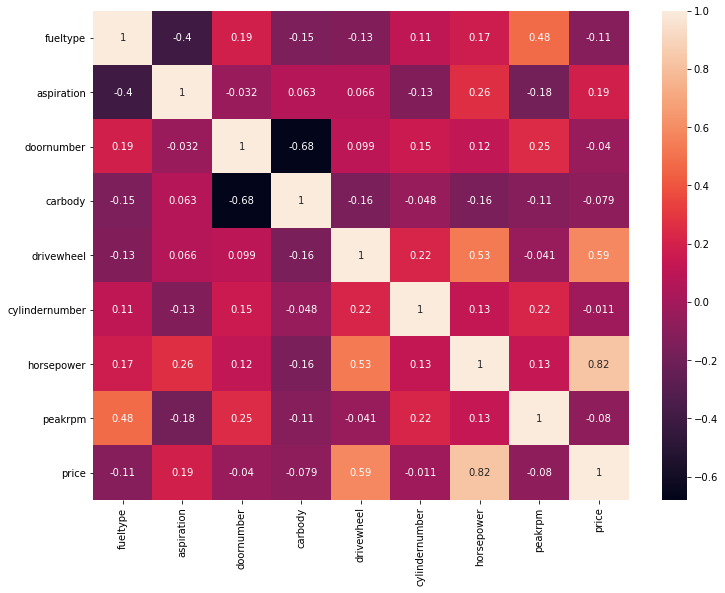

In [55]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [56]:
# Splitting the dataset into the Training set and Test set
# f = ['fueltype','aspiration','doornumber','carbody','drivewheel','cylindernumber','horsepower','peakrpm','price']
f = ['aspiration','drivewheel','horsepower']
X = df[f]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Simple Linear Regression

In [57]:
# Fitting Simple Linear Regression to the Training set (M2)
f1 = ['horsepower']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([178.7821449]), -5270.298695142399)

In [58]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.711

In [59]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(4203.41, 5064.54)

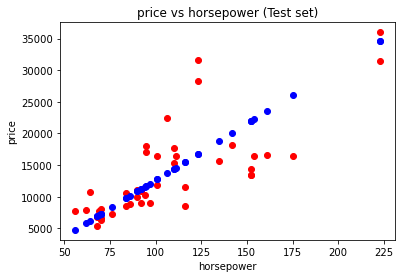

In [60]:
# Visualising the Test set results
plt.scatter(X_test['horsepower'], y_test, color = 'red')
plt.plot(X_test['horsepower'], sr.predict(X_test[f1]), 'bo')
plt.title('price vs horsepower (Test set)')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()


## Multiple Linear Regression

In [61]:
#!pip install statsmodels

In [62]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

0.745

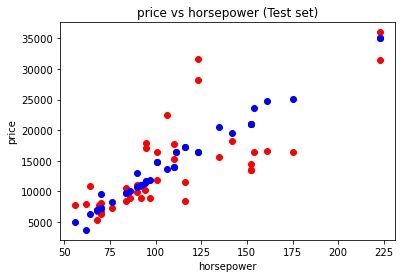

In [63]:
# Visualising the Test set results
plt.scatter(X_test['horsepower'], y_test, color = 'red')
plt.plot(X_test['horsepower'], mr.predict(X_test), 'bo')
plt.title('price vs horsepower (Test set)')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

In [65]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     155.7
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           3.05e-47
Time:                        16:16:32   Log-Likelihood:                -1590.7
No. Observations:                 164   AIC:                             3189.
Df Residuals:                     160   BIC:                             3202.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6626.6985    975.094     -6.796      0.000   -8552.412   -4700.985
aspiration -2035.5349    865.117     -2.353      0.020   -3744.055    -327.015
drivewheel  2297.9122    683.236      3.363      0.001     948.588    3647.236
horsepower   166.5107     10.730     15.518      0.000     145.319     187.702
==============================================================================
Omnibus:                       10.745   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.089
Skew:                           0.492   Prob(JB):                      0.00237
Kurtosis:                       3.896   Cond. No.                         353.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multiple Linear Regression оказался лучшим методом чем Linear Regression, так как R^2 у него больше.